<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E6%A0%B8%E5%8C%96%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F/svm_3%E4%BD%BF%E7%94%A8SVC%E6%A8%A1%E5%9E%8B_%E5%BB%BA%E7%AB%8B%E9%9D%9E%E7%9B%B4%E7%B7%9A%E7%9A%84%E6%B1%BA%E7%AD%96%E9%82%8A%E7%95%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
%pip install mglearn

這個 mglearn.tools.make_handcrafted_dataset() 函式,用來建立一個小型、人工設計的二維資料集。

這個資料集主要用於教學和視覺化目的，特別是當解釋分類演算法（如支援向量機 SVM）如何運作時。

### 這個資料集的特點：

1. **人工設計 (Handcrafted)**: 資料點的位置不是隨機生成的，而是經過精心設計，用來突顯某些機器學習概念。通常，它會包含一些不容易用簡單線性模型完美分離的模式，這使得它很適合用來展示像 SVM 這樣更複雜模型的優勢。

2. **小型 (Small)**: 資料點的數量不多，方便快速訓練模型和視覺化決策邊界。

3. **二維 (2D)**: 只有兩個特徵，所以可以輕易地在二維平面上繪製出來，幫助理解演算法如何劃分不同類別的資料。

4. **用於分類 (For Classification)**: y 變數的存在表明這是一個監督式學習中的分類問題。

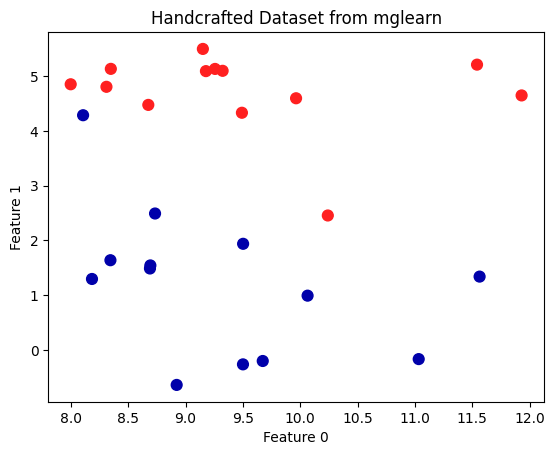

In [ ]:
import matplotlib.pyplot as plt
import mglearn


X, y = mglearn.tools.make_handcrafted_dataset()

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Handcrafted Dataset from mglearn")
plt.show()


Text(0, 0.5, 'Feature 1')

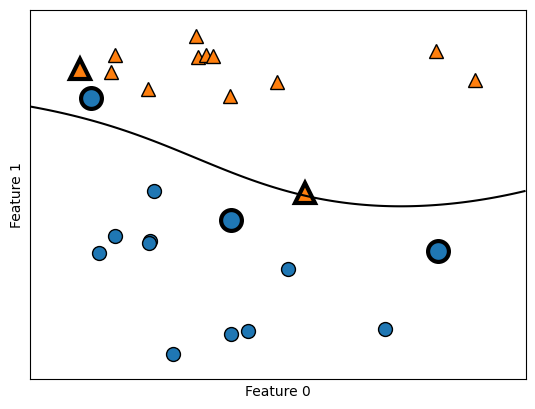

In [ ]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.svm import SVC


X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y) #參考說明1
mglearn.plots.plot_2d_separator(svm, X, eps=.5) #參考說明2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_ #參考說明3
# class labels of support vectors are given by the sign of the dual coefficients

sv_labels = svm.dual_coef_.ravel() > 0 #參考說明4

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

⬆︎在這種情況下，SVM 產生非常平滑且非線性（不是直線）的邊界。

這裡我們調整了兩個參數：C參數和gamma參數

展示了在一個二維兩類數據集上訓練支持向量機的結果。決策邊界以黑色顯示，支持向量則以較大的點和寬邊框標示。

### 說明1

**SVC(kernel='rbf', C=10, gamma=0.1)**

- 建立一個 SVC 模型的實例。
kernel='rbf': 指定 SVM 使用的核函數 (kernel function)。'rbf' 代表徑向基函數 (Radial Basis Function) 核，這是一種常用的核函數，可以處理非線性可分的資料。
- C=10: 設定懲罰參數 (penalty parameter) C。C 控制了對誤分類樣本的懲罰程度。較大的 C 值會導致模型更努力地將所有訓練樣本正確分類，可能會產生更複雜的決策邊界，但也可能導致過度擬合 (overfitting)。較小的 C 值則允許一些誤分類，可能會產生更平滑的決策邊界，但也可能導致擬合不足 (underfitting)。
- gamma=0.1: 設定 RBF 核的參數 gamma。gamma 定義了單個訓練樣本的影響範圍。較小的 gamma 值意味著影響範圍較大，決策邊界會比較平滑；較大的 gamma 值意味著影響範圍較小，決策邊界會更緊密地圍繞著資料點，可能會更複雜。


### 說明2
**mglearn.plots.plot_2d_separator(svm, X, eps=.5)**

- 呼叫 mglearn.plots.plot_2d_separator() 函式來視覺化已經訓練好的 svm 模型的決策邊界。
- svm: 傳入已經訓練好的 SVM 模型。
- X: 傳入原始資料集的特徵，這樣可以在決策邊界圖上同時顯示資料點。
- eps=.5: 這個參數通常用來調整繪圖時背景網格的細膩程度或等高線的平滑度。eps (epsilon) 較小的值會產生更精細的網格和更平滑的邊界，但計算量也更大。在這裡，它可能影響了背景顏色填充的範圍或平滑度。


### 說明3
sv = svm.support_vectors_
- 這是 scikit-learn 中 SVM 模型（如 SVC, SVR, NuSVC, NuSVR, OneClassSVM）在訓練完成後會產生的一個屬性 (attribute)。
- 這個屬性儲存的是支援向量。支援向量是在訓練過程中，對於定義決策邊界 (decision boundary) 或超平面 (hyperplane) 最重要的那些資料點。
- 它們是那些最接近決策邊界的點，或者是那些在「邊界區域」(margin) 內，甚至是那些被錯誤分類的點（在軟邊界 SVM 中）。
- 決策邊界的位置完全由這些支援向量決定。如果移動或移除其他非支援向量的資料點，決策邊界通常不會改變。

### 說明4
sv_labels = svm.dual_coef_.ravel() > 0 的目的是`產生一個布林 (boolean) 陣列，用來區分支援向量 (support vectors) 是屬於哪一個類別（在二元分類中，通常是區分正類或負類）`。這在視覺化支援向量時特別有用，可以根據它們所屬的類別給予不同的標記或顏色。

- .ravel():這是一個 NumPy 陣列的方法，它會將 svm.dual_coef_ 這個可能是二維的陣列（即使只有一行）「攤平」成一個一維陣列。所以，形狀從 (1, n_SV) 變成了 (n_SV,)。